part 1: Affine Factorization

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import *
import numpy.linalg as la
import cv2



In [3]:
img_list = []
for i in range(1, 102):
        img_list.append(cv2.imread('factorization_data/frame%s.jpg' % (str(i).zfill(8)),cv2.IMREAD_GRAYSCALE))

matrixs = np.loadtxt('factorization_data/measurement_matrix.txt')


n_image, n_points = matrixs.shape

n_image = n_image // 2


#center the data
for i in range(n_image):
    
    mean_x = np.mean(matrixs[2 * i])
    matrixs[2 * i] = matrixs[2 * i] - mean_x
    
    mean_y = np.mean(matrixs[2 * i + 1])
    matrixs[2 * i + 1] = matrixs[2 * i + 1] - mean_y



U, s, V = np.linalg.svd(matrixs)

u = U[:, :3]
s = np.diag(s)
s = s[:3, :3]
v = V[:3, :]


M = np.matmul(u, np.sqrt(s)) #A
S = np.matmul(np.sqrt(s), v)

D = np.matmul(M, S)


r = []
out = []

for i in range(n_image):
    cur = M[2 * i:2 * i + 2]
    r.append(np.outer(cur[0], cur[0]).reshape(-1))
    r.append(np.outer(cur[0], cur[1]).reshape(-1))
    r.append(np.outer(cur[1], cur[0]).reshape(-1))
    r.append(np.outer(cur[1], cur[1]).reshape(-1))

    out.append(1)
    out.append(0)
    out.append(0)
    out.append(1)


L = la.lstsq(np.array(r), np.array(out), rcond=None)[0].reshape((3, 3))
Q = la.cholesky(L)
M = M @ Q
S = la.pinv(Q) @ S

print(Q)


[[0.0796754  0.         0.        ]
 [0.00075727 0.08491913 0.        ]
 [0.00261389 0.00474193 0.03999405]]


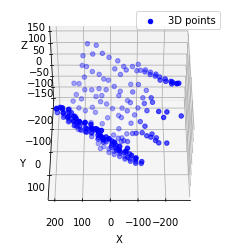

In [4]:
proj = (M @ S) + np.mean(matrixs, axis=1, keepdims=True)
res = 0
frames = [50]
x = []
y = []
ax = plt.axes(projection='3d')
ax.view_init(45, 90)
ax.scatter(S[0], S[1], S[2], c='b', label='3D points')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()
    # proj2d = (P_matrices @ pts3) + means
    
# for f in range(len(img_list)):
#     a = sum((matrixs[f] - proj[f])**2)
#     # b = (raw_data_mtx[2 * f + 1] - proj2d[2 * f + 1]) ** 2
#     # r = a+b
#     res += a
#     x.append(f)
#     # x.append(f)
#     y.append(a)
    # plt.figure()
    # plt.imshow(imgs[f], cmap='gray')
    # plt.scatter(raw_data_mtx[2 * f], raw_data_mtx[2 * f + 1], c='g',
    #             label='Observed feature points')
    # plt.scatter(proj2d[2 * f], proj2d[2 * f + 1], c='r', marker='+',
    #             label='Estimated feature points')

# plt.scatter(x, y)
# plt.show()
# print(res)  

